# Predictive Analytics HW 3 - Tomisin 

## Research Problem
Can we predict how expensive a laptop would be given different features of the laptop?

In [1]:
import pandas as pd

## Load Data
1. [Dataset](https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset)

In [2]:
data = pd.read_csv("laptopPrice.csv")
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

## Data Preprocessing

### Drop Duplicates

In [4]:
data = data[~data.duplicated()].reset_index(drop=True)
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [5]:
for col in data.columns:
    print(col, data[col].unique())

brand ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
processor_brand ['Intel' 'AMD' 'M1']
processor_name ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
processor_gnrtn ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
ram_gb ['4 GB' '8 GB' '16 GB' '32 GB']
ram_type ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
ssd ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
hdd ['1024 GB' '0 GB' '512 GB' '2048 GB']
os ['Windows' 'DOS' 'Mac']
os_bit ['64-bit' '32-bit']
graphic_card_gb ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
weight ['Casual' 'ThinNlight' 'Gaming']
warranty ['No warranty' '1 year' '2 years' '3 years']
Touchscreen ['No' 'Yes']
msoffice ['No' 'Yes']
Price [ 34649  38999  39999  69990  26990  22990  21990  58799  49999  59990
  93700  72990  17490  35990  56490  65390  31999  32490  31799  29890
  23990  32955  46200  34429  37990  33980  39990  39490  53990  38990
  37890 

### Encode categorical columns

In [6]:
categorical = ['brand', 'processor_brand', 'processor_name', 'ram_type', 'os', 'weight']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
for column in categorical:
    data[column] = label_encoder.fit_transform(data[column])

In [9]:
for col in ['Touchscreen', 'msoffice']:
    data[col] = data[col].map({'No':0, 'Yes':1})

In [10]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,0,0,34649,2 stars,3,0
1,5,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,0,0,38999,3 stars,65,5
2,5,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,0,0,39999,3 stars,8,1
3,1,1,2,10th,8 GB,1,512 GB,0 GB,2,32-bit,2 GB,0,No warranty,0,0,69990,3 stars,0,0
4,1,1,0,Not Available,4 GB,1,0 GB,512 GB,2,64-bit,0 GB,0,No warranty,0,0,26990,3 stars,0,0


### Clean numerical columns

In [11]:
def clean_gb(x):
    return x[:-3]

In [12]:
gb_columns = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']

In [13]:
for col in gb_columns:
    data[col] = data[col].apply(clean_gb).astype('int64')

In [14]:
data['os_bit'] = data['os_bit'].apply(lambda x:x[:2]).astype('int64')
data['rating'] = data['rating'].apply(lambda x:x[:1]).astype('int64')
data['processor_gnrtn'] = data['processor_gnrtn'].apply(lambda x:x[:-2] if 'th' in x else 0).astype('int64')
data['warranty'] = data['warranty'].apply(lambda x:x[0] if "year" in x else 0).astype('int64')

In [15]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,34649,2,3,0
1,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,38999,3,65,5
2,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,39999,3,8,1
3,1,1,2,10,8,1,512,0,2,32,2,0,0,0,0,69990,3,0,0
4,1,1,0,0,4,1,0,512,2,64,0,0,0,0,0,26990,3,0,0


### Make Price a Categorical Variable

The Price is currently in rupees, convert to Dollar

In [16]:
data['Price'] = data['Price'].apply(lambda x:x*0.012)

In [17]:
import matplotlib.pyplot as plt

(array([345., 303.,  93.,  38.,   8.,  10.,   4.,   0.,   0.,   1.]),
 array([ 203.88,  713.88, 1223.88, 1733.88, 2243.88, 2753.88, 3263.88,
        3773.88, 4283.88, 4793.88, 5303.88]),
 <BarContainer object of 10 artists>)

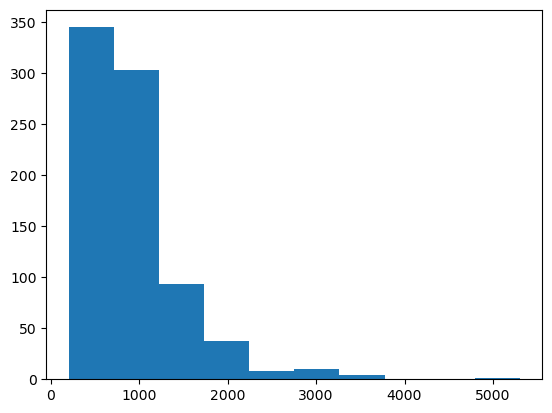

In [18]:
# visualize spread 
plt.hist(data['Price'], bins=10)

Put the price in categories based on these rules:
* <= 800: Affordable (0)
* 800 < x <= 1500: Expensive (1)
* 1500 < x <= 2200: Very Expensive (2)
* \> 2200: Outrageous (3)

In [19]:
data['Price'] = pd.cut(data['Price'], bins=[-float('inf'), 800, 1500, 2200, float('inf')], labels=[0, 1, 2, 3], include_lowest=True, right=False).astype('int64')

In [20]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,2,3,0
1,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,65,5
2,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,8,1
3,1,1,2,10,8,1,512,0,2,32,2,0,0,0,0,0,3,0,0
4,1,1,0,0,4,1,0,512,2,64,0,0,0,0,0,0,3,0,0


In [20]:
data['Price'].value_counts()

0    432
1    277
2     69
3     24
Name: Price, dtype: int64

In [21]:
import seaborn as sns

### Drop Highly Correlated Columns

<Axes: >

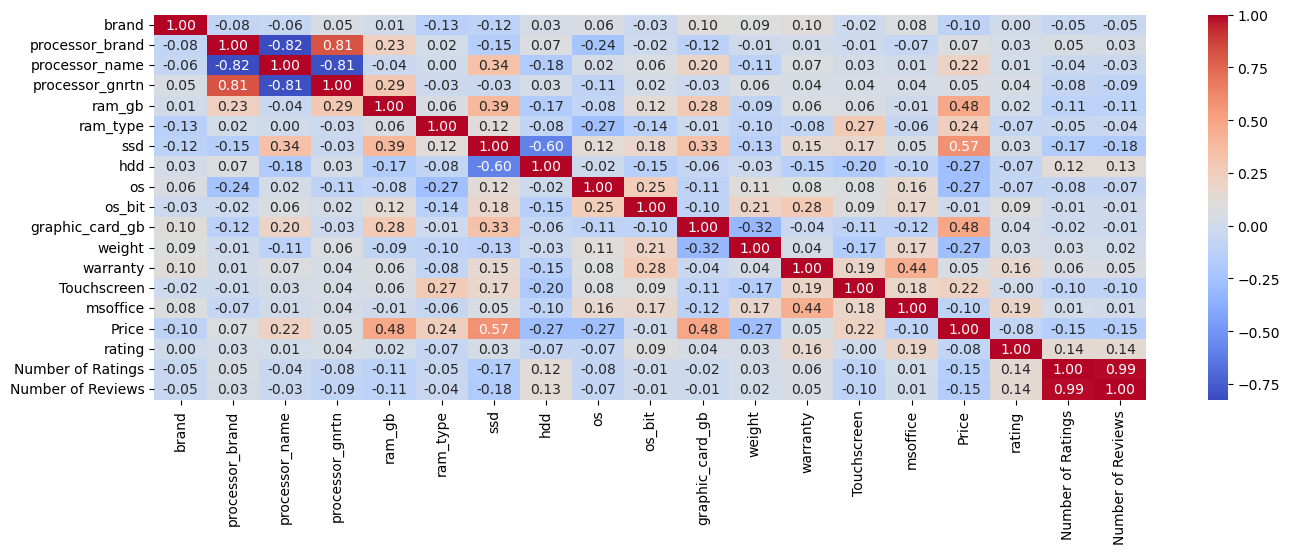

In [22]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Processor name, processor generation and Processor brand, as well as number of ratings and number of reviews, are highly correlated, so let's drop one from either column

In [23]:
data.drop(['processor_name', 'processor_gnrtn', 'Number of Reviews'], axis=1, inplace=True)

In [24]:
data.head()

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings
0,1,1,4,1,0,1024,2,64,0,0,0,0,0,0,2,3
1,5,1,4,1,0,1024,2,64,0,0,0,0,0,0,3,65
2,5,1,4,1,0,1024,2,64,0,0,0,0,0,0,3,8
3,1,1,8,1,512,0,2,32,2,0,0,0,0,1,3,0
4,1,1,4,1,0,512,2,64,0,0,0,0,0,0,3,0


Since most of the variables are categorical, standardization is not really too needed for most columns, we can standardize the Number of Ratings column.

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

In [26]:
data['Number of Ratings'] = scaler.fit_transform(np.array(data['Number of Ratings']).reshape(-1,1)).flatten()

In [27]:
data.head()

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings
0,1,1,4,1,0,1024,2,64,0,0,0,0,0,0,2,-0.296500
1,5,1,4,1,0,1024,2,64,0,0,0,0,0,0,3,-0.234572
2,5,1,4,1,0,1024,2,64,0,0,0,0,0,0,3,-0.291506
3,1,1,8,1,512,0,2,32,2,0,0,0,0,1,3,-0.299497
4,1,1,4,1,0,512,2,64,0,0,0,0,0,0,3,-0.299497


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              802 non-null    int32  
 1   processor_brand    802 non-null    int32  
 2   ram_gb             802 non-null    int64  
 3   ram_type           802 non-null    int32  
 4   ssd                802 non-null    int64  
 5   hdd                802 non-null    int64  
 6   os                 802 non-null    int32  
 7   os_bit             802 non-null    int64  
 8   graphic_card_gb    802 non-null    int64  
 9   weight             802 non-null    int32  
 10  warranty           802 non-null    int64  
 11  Touchscreen        802 non-null    int64  
 12  msoffice           802 non-null    int64  
 13  Price              802 non-null    int64  
 14  rating             802 non-null    int64  
 15  Number of Ratings  802 non-null    float64
dtypes: float64(1), int32(5), i

## Modelling

### Split into train and test

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1).values
y = data['Price'].values

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### KNN Model

In [37]:
from scipy.stats import mode 
    
class KNN():  
    
    def __init__(self, K): 
        self.K = K 
                    
    def fit(self, X_train, Y_train): 
        self.X_train = X_train 
        self.Y_train = Y_train           
        self.m, self.n = X_train.shape 
          
    def predict(self, X_test): 
        self.X_test = X_test           
        self.m_test, self.n = X_test.shape 
                  
        Y_predict = np.zeros(self.m_test) 
          
        for i in range(self.m_test): 
            x = self.X_test[i]               
            # neighbors = np.zeros(self.K) 
            neighbors = self.find_neighbors(x) 
              
            # most frequent class in K neighbors 
            Y_predict[i] = mode(neighbors, keepdims=True)[0][0]     
        return Y_predict 
      
    # find the K nearest neighbors to current test point 
    def find_neighbors(self, x):  
        euclidean_distances = np.zeros(self.m) 
          
        for i in range(self.m): 
            d = self.euclidean(x, self.X_train[i]) 
            euclidean_distances[i] = d 
        
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.K] 
                    
    def euclidean(self, x, x_train): 
        return np.sqrt(np.sum(np.square(x - x_train))) 

### Model Training

In [38]:
from sklearn.metrics import accuracy_score

In [49]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

In [47]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [76]:
knn_model = KNN(K=3)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
models = [knn_model, svm_model, dt_model, rf_model, gb_model]

In [77]:
for model in models:
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

KNN Accuracy: 0.7205
SVC Accuracy: 0.7640
DecisionTreeClassifier Accuracy: 0.6522
RandomForestClassifier Accuracy: 0.7391
GradientBoostingClassifier Accuracy: 0.8012


In [78]:
gb_model

GradientBoostingClassifier(random_state=42)

## Hyperparemeter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [56]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

In [57]:
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [58]:
best_rf_model = rf_grid_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [59]:
rf_predictions = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Best Random Forest Accuracy: {rf_accuracy:.4f}")
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

Best Random Forest Accuracy: 0.7702
Best Random Forest Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### Gradient Boosting

In [155]:
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5]
}

In [156]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [157]:
best_gb_model = gb_grid_search.best_estimator_
best_gb_model

GradientBoostingClassifier(min_samples_split=5, random_state=42)

In [158]:
gb_predictions = best_gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Best Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)

Best Gradient Boosting Accuracy: 0.8075
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'min_samples_split': 5, 'n_estimators': 100}


## Results

| Algorithm    | Best Accuracy |
| -------- | ------- |
| KNN  |  0.7205   |
| SVM | 0.7640     |
| Decision Tree    | 0.6522  |
| Random Forest | 0.7702 |
| Gradient Boosting | 0.8075 |

Text(0.5, 1.0, 'Most Important Features according to Gradient Boosting')

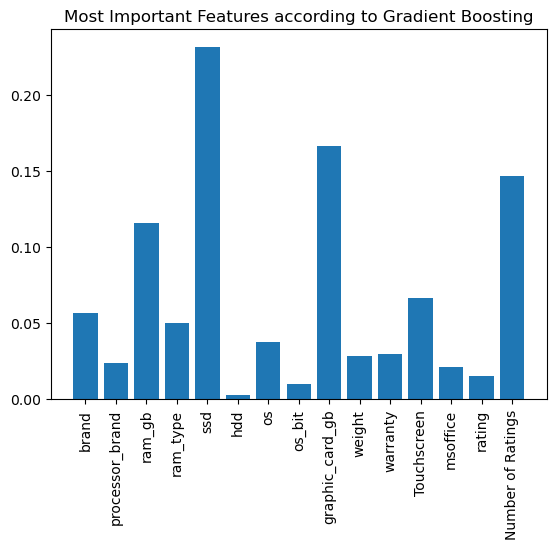

In [166]:
plt.bar(data.drop('Price', axis=1).columns, best_gb_model.feature_importances_)
plt.xticks(rotation=90)
plt.title('Most Important Features according to Gradient Boosting')

Text(0.5, 1.0, 'Most Important Features according to Random Forest')

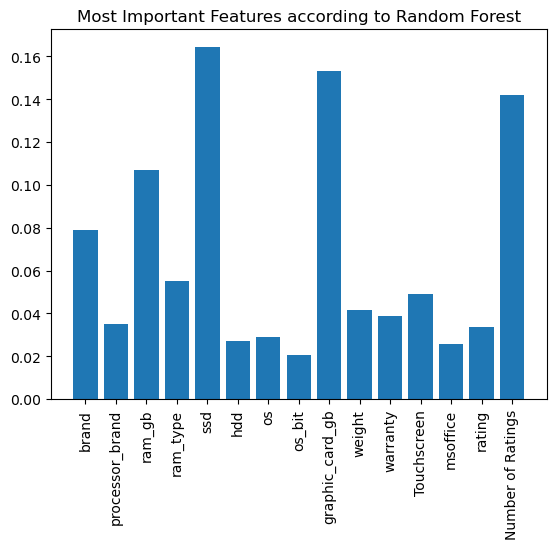

In [167]:
plt.bar(data.drop('Price', axis=1).columns, best_rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.title('Most Important Features according to Random Forest')

From the documentation: "Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values)", so we can ignore the high importance of the Number of Ratings